In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_AE_1.xlsx', header=None,names=column_names)
df

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0453,0.0523,0.0843,NaN,0.1183,0.2583,0.2156,0.3481,0.3337,NaN,0.4918,0.6552,0.6919,NaN,0.7464,NaN,NaN,NaN,NaN,NaN,NaN,0.4052,0.3957,0.3914,NaN,0.3200,NaN,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,NaN,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,NaN,0.0203,NaN,0.0742,NaN,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.9979,0.8297,0.7032,0.7141,0.6893,0.4961,0.2584,0.0969,0.0

In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	4
float64		column 3	4
float64		column 4	4
float64		column 5	0
float64		column 6	8
float64		column 7	0
float64		column 8	0
float64		column 9	0
float64		column 10	0
float64		column 11	0
float64		column 12	0
float64		column 13	0
float64		column 14	0
float64		column 15	0
float64		column 16	0
float64		column 17	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,208.000000,204.000000,204.000000,204.000000,208.000000,200.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.214075,0.196909,0.161567,0.123091,0.091424,0.052325,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.133291,0.151505,0.134353,0.087501,0.062417,0.036021,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.126875,0.095175,0.068775,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.177700,0.148000,0.121600,0.102600,0.078100,0.045100,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.271750,0.229275,0.200375,0.154425,0.120100,0.069925,0.025275,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.776200,0.703400,0.729200,0.552200,0.333900,0.198100,0.082500,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

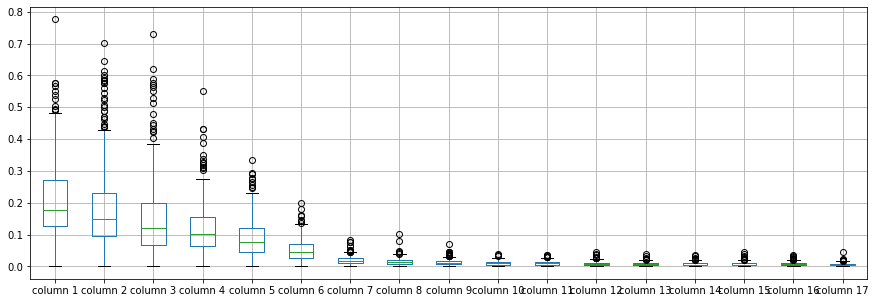

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.214075
column 2     0.196909
column 3     0.161567
column 4     0.123091
column 5     0.091424
column 6     0.052325
column 7     0.020424
column 8     0.016069
column 9     0.013420
column 10    0.010709
column 11    0.010941
column 12    0.009290
column 13    0.008222
column 14    0.007820
column 15    0.007949
column 16    0.007941
column 17    0.006507
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.839514,0.636401,0.523422,0.498020,0.470047,0.303407,0.316501,0.217849,0.139544,0.095210,0.097255,0.133169,0.108185,0.109166,0.154547,0.108190
column 2,0.839514,1.000000,0.866584,0.693737,0.636188,0.597040,0.487232,0.427968,0.348392,0.193286,0.153133,0.234741,0.200043,0.167463,0.164431,0.182844,0.154395
column 3,0.636401,0.866584,1.000000,0.862404,0.649371,0.628815,0.642254,0.510864,0.431323,0.238972,0.192276,0.263174,0.185044,0.158773,0.235795,0.199757,0.185489
column 4,0.523422,0.693737,0.862404,1.000000,0.831645,0.756640,0.641623,0.572580,0.395279,0.214194,0.152009,0.192714,0.161953,0.169135,0.235209,0.207562,0.138085
column 5,0.498020,0.636188,0.649371,0.831645,1.000000,0.897403,0.555137,0.573572,0.365149,0.206376,0.209084,0.210950,0.219052,0.196814,0.270198,0.221425,0.123666
column 6,0.470047,0.597040,0.628815,0.756640,0.897403,1.000000,0.656898,0.546658,0.324024,0.175674,0.207338,0.241244,0.178720,0.189948,0.324555,0.209254,0.103197
column 7,0.303407,0.487232,0.642254,0.641623,0.555137,0.656898,1.000000,0.447926,0.341667,0.279681,0.280477,0.287612,0.235053,0.201609,0.342866,0.178118,0.139944
column 8,0.316501,0.427968,0.510864,0.572580,0.573572,0.546658,0.447926,1.000000,0.627038,0.330396,0.384052,0.278935,0.209752,0.191407,0.325665,0.317942,0.246764
column 9,0.217849,0.348392,0.431323,0.395279,0.365149,0.324024,0.341667,0.627038,1.000000,0.540414,0.343190,0.337581,0.203121,0.191264,0.309673,0.298711,0.195379
column 10,0.139544,0.193286,0.238972,0.214194,0.206376,0.175674,0.279681,0.330396,0.540414,1.000000,0.412337,0.315656,0.421588,0.308197,0.370764,0.346095,0.280780


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+34,17+34+34,17+34+34+34,17+34+34,17+34,17], vae_layer = False, seed = 340)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.1479943623909583
Epoch: 1 , loss: 1.1050347685813904
Epoch: 2 , loss: 1.084166407585144
Epoch: 3 , loss: 1.0725484169446504
Epoch: 4 , loss: 1.0576731195816627
Epoch: 5 , loss: 1.0463497592852666
Epoch: 6 , loss: 1.0446424942750197
Epoch: 7 , loss: 1.0402407875427833
Epoch: 8 , loss: 1.0278419302060053
Epoch: 9 , loss: 1.0304126326854413
Epoch: 10 , loss: 1.023577561745277
Epoch: 11 , loss: 1.0203423912708576
Epoch: 12 , loss: 1.0167583043758686
Epoch: 13 , loss: 1.0166629277742827
Epoch: 14 , loss: 1.008910596370697
Epoch: 15 , loss: 1.0101815645511334
Epoch: 16 , loss: 1.001063952079186
Epoch: 17 , loss: 1.0055378492061908
Epoch: 18 , loss: 1.0009184112915626
Epoch: 19 , loss: 0.9913700268818781
Epoch: 20 , loss: 0.987718247450315
Epoch: 21 , loss: 0.9972838484323941
Epoch: 22 , loss: 0.9819923455898578
Epoch: 23 , loss: 0.9815405057026789
Epoch: 24 , loss: 0.9817942335055425
Epoch: 25 , loss: 0.98

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


ValueError: cannot join with no overlapping index names

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Letter_AW_5(imp).xlsx", index=False, header=False)